## Importações 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Rede Neural Artificial
A rede neural é um modelo de aprendizado de máquina que se baseia na estrutura do cérebro humano, composta por neurônios artificiais organizados em camadas.

Assim como na floresta aleatória, onde várias árvores trabalham juntas para tomar uma decisão, nas redes neurais, muitos neurônios simples trabalham em conjunto para formar um modelo poderoso.

Os parâmetros fundamentais a serem ajustados incluem a arquitetura da rede (número de camadas e neurônios), a função de ativação e o algoritmo de otimização. Encontrar o equilíbrio entre complexidade e capacidade de generalização é crucial para o desempenho do modelo.

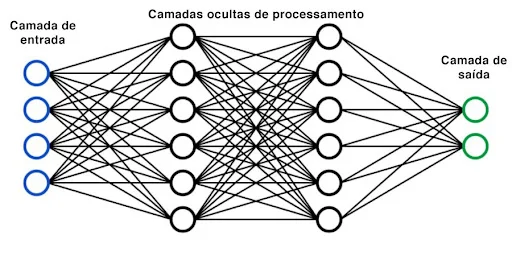

- Os dados utilizados estão na pasta dados contidos no arquivo ```heart.csv```.

In [2]:
df = pd.read_csv("dados/heart.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
X = df.drop('HeartDisease', axis= 1)
Y = df.HeartDisease

In [5]:
# Binarização dos inputs categóricos
onehot = OneHotEncoder(sparse_output= False, drop='first')
X_bin = onehot.fit_transform(X.select_dtypes(include= ['object']))

# Normalização dos inputs numéricos
normalizador = MinMaxScaler()
X_norm = normalizador.fit_transform(X.select_dtypes(exclude= ['object']))

# Junção dos inputs
X_all = np.append(X_bin, X_norm, axis= 1)
X_all

array([[1.        , 1.        , 0.        , ..., 0.        , 0.78873239,
        0.29545455],
       [0.        , 0.        , 1.        , ..., 0.        , 0.67605634,
        0.40909091],
       [1.        , 1.        , 0.        , ..., 0.        , 0.26760563,
        0.29545455],
       ...,
       [1.        , 0.        , 0.        , ..., 0.        , 0.38732394,
        0.43181818],
       [0.        , 1.        , 0.        , ..., 0.        , 0.8028169 ,
        0.29545455],
       [1.        , 0.        , 1.        , ..., 0.        , 0.79577465,
        0.29545455]])

## Treinando o classificador
### Aplicando a Rede Neural
Parâmetros mais importantes:
- hidden_layer_sizes: número de neurônios em cada camada
- activation: funcão de ativação
- solver: optimizador
- batch_size: tamanho do lote de dados usado no treinamento em cada época
- max_iter: número de épocas

In [6]:
# Divisão dos conjuntos de treinamento e teste
X_train, X_test, Y_train, Y_test = train_test_split(X_all, Y, test_size= 0.25, random_state= 42)

In [7]:
from sklearn.neural_network import MLPClassifier

cls = MLPClassifier(hidden_layer_sizes=(64,), activation= 'relu',
                    solver= 'adam', batch_size= 32, max_iter= 150,
                    random_state= 1)

cls.fit(X_train, Y_train)

C:\Users\Win10\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(batch_size=32, hidden_layer_sizes=(64,), max_iter=150,
              random_state=1)

In [8]:
Y_pred = cls.predict(X_test)
Y_pred

array([0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0], dtype=int64)

## Avaliando o classificador

In [9]:
accuracy_score(Y_test, Y_pred)

0.9043478260869565

In [10]:
print(classification_report(Y_pred, Y_test))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       102
           1       0.90      0.93      0.92       128

    accuracy                           0.90       230
   macro avg       0.90      0.90      0.90       230
weighted avg       0.90      0.90      0.90       230



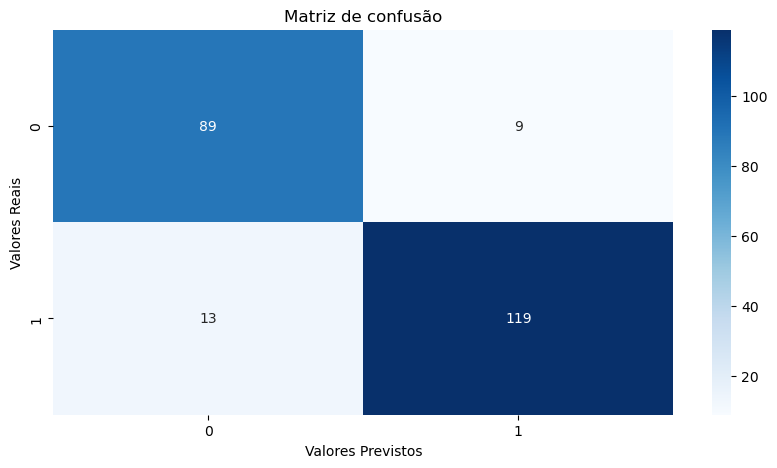

In [11]:
matriz_confusao = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize= (10, 5))
sns.heatmap(matriz_confusao, annot=True, cmap='Blues', fmt='g')
plt.title('Matriz de confusão')
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Reais')

plt.show()